In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

Text(0.5, 1.0, 'Temperature')

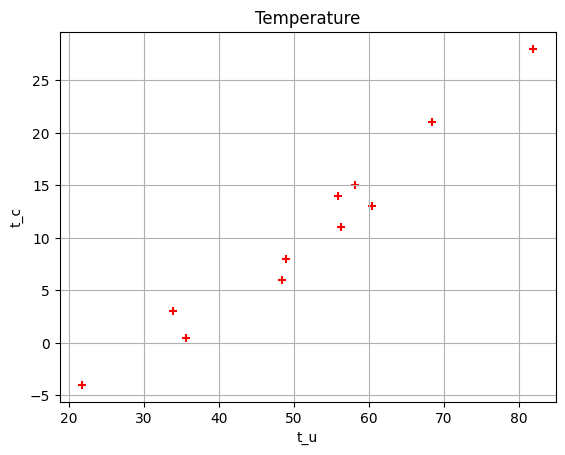

In [5]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = t_u * 0.1

plt.scatter(t_u,t_c, color='red',marker= '+')
plt.grid()
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Temperature')

In [6]:
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [7]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [8]:
import torch.optim as optim

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([-2.6181e+00, -2.3049e+02, -5.9642e-02], requires_grad=True)

In [9]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params

tensor([ -1.7968, -16.3953,  -0.4818], requires_grad=True)

In [10]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

SGD

0.0008
Epoch 500, Loss 4.195781
Epoch 1000, Loss 3.548735
Epoch 1500, Loss 3.478307
Epoch 2000, Loss 3.446147
Epoch 2500, Loss 3.417074
Epoch 3000, Loss 3.388778
Epoch 3500, Loss 3.361097
Epoch 4000, Loss 3.334007
Epoch 4500, Loss 3.307492
Epoch 5000, Loss 3.281543


Text(0.5, 1.0, 'Temperature')

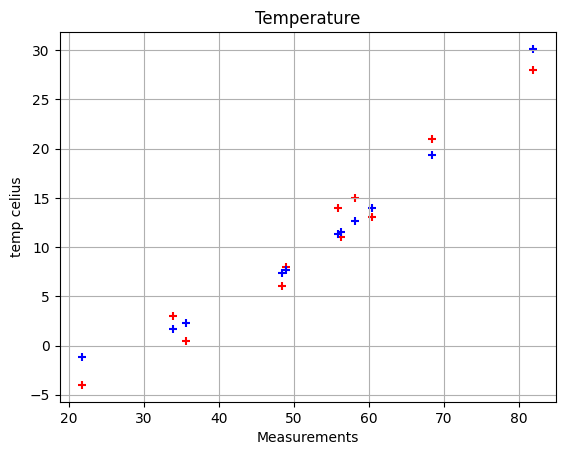

In [11]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 8e-4
optimizer = optim.SGD([params], lr=learning_rate) # <1>
print(learning_rate)
params = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, # <1>
    t_u = t_un,
    t_c = t_c)

t_p = model(t_un, *params)
plt.scatter(t_u,t_c, color='red',marker= '+')
plt.scatter(t_u,t_p.detach().numpy(), color='blue',marker= '+')
plt.grid()
plt.xlabel('Measurements')
plt.ylabel('temp celius')
plt.title('Temperature')

ADAM

In [22]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 5e-1
optimizer = optim.Adam([params], lr=learning_rate) # <1>
print(learning_rate)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <2>
    t_c = t_c)

0.5
Epoch 500, Loss 3.470972
Epoch 1000, Loss 3.369133
Epoch 1500, Loss 3.289435
Epoch 2000, Loss 3.187369
Epoch 2500, Loss 3.064371
Epoch 3000, Loss 2.923462
Epoch 3500, Loss 2.792620
Epoch 4000, Loss 3.522834
Epoch 4500, Loss 29.497511
Epoch 5000, Loss 2.513976


tensor([ 4.3812e-02,  4.6928e-03, -5.4357e+00], requires_grad=True)